# Assignment 2 - MC906: Approximating images with 50 circles using Genetic Algorithm

## Problem modeling:

### Individual: an image with 50 circles

Each circle (gene) has the following parameters:
* left(float): distance to the left normalized between [0.0, 1.0]
* top(float): distance to the top normalized between [0.0, 1.0]
* radius(float): Circle radius
* color(array-like(h,s,v)): Color to be used on render coded as HSV
* alpha(float): Opacity level bound to [0.0, 1.0]

### Population: several sets with 50 circles each


In [1]:
""" Circle plotting comparison """

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat

FILL_CIRCLE = -1

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

images = np.full(shape=(3, 500,500, 3), dtype=np.uint8, fill_value=255)
images[:, :250, :, :2] = 0
xy = (250, 250)
radius = 200
alpha = 0.5
color = (255, 0, 0)
norm_color = tuple(c/255 if c > 1 else c for c in color)

# Matplotlib.pyplot
image, ax = images[0], axs[0]
ax.add_artist(plt.Circle(xy, radius, facecolor=norm_color, alpha=alpha, antialiased=False))
ax.imshow(image)
ax.set_title('Matplotlib.pyplot')

# Matplotlib.patches
image, ax = images[1], axs[1]
ax.add_patch(pat.Circle(xy, radius, facecolor=norm_color, alpha=alpha, antialiased=False))
ax.imshow(image)
ax.set_title('Matplotlib.patches')

# OpenCV
# https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#circle
image, ax = images[2], axs[2]
circle = np.copy(image)
cv2.circle(circle, center=xy, radius=radius, color=color, thickness=FILL_CIRCLE)
cv2.addWeighted(src1=circle, alpha=alpha, src2=image, beta=1-alpha, gamma=0, dst=image)
ax.imshow(image)
ax.set_title('OpenCV')

# fig.savefig('image', dpi=50)
plt.show()

<Figure size 1500x500 with 3 Axes>

## Useful links:

Aproximação por triangulos: https://github.com/DING-PENG/image-approx

## Indivíduos


<IPython.core.display.Javascript object>


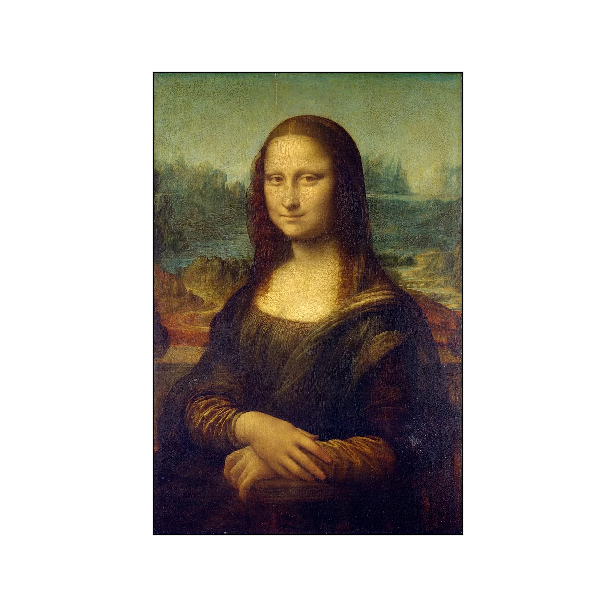

<IPython.core.display.Javascript object>


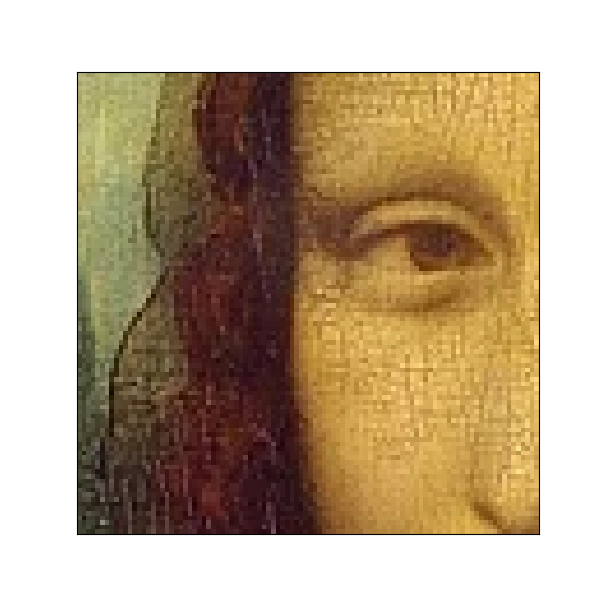

<IPython.core.display.Javascript object>


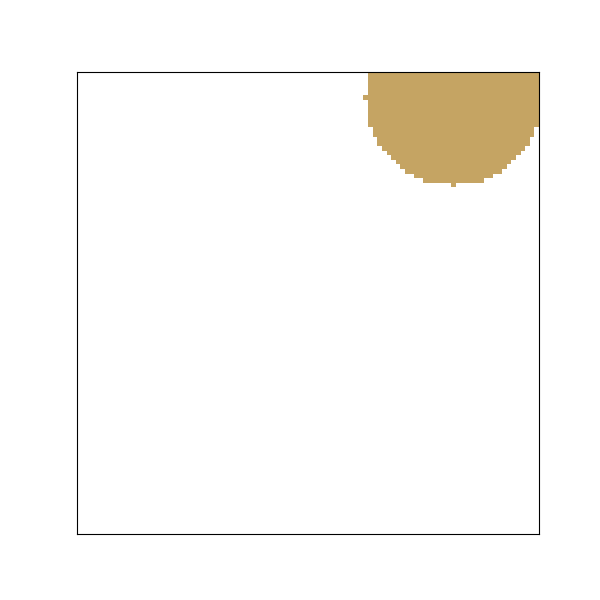

Gen: 0 Fitness: 3342122
5
5en: 1 Best: 3342122 Mean: 3361944.7
5en: 2 Best: 3300544 Mean: 3335598.1


TypeError: only size-1 arrays can be converted to Python scalars

In [2]:
%matplotlib notebook
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from time import time

from circle import Circle
from image_from_circles import ImageFromCircles
from individual import Individual
from evolve import Evolve
from utils import rms, plot_image, save_image

from skimage.measure import compare_ssim
from IPython import display

# plot_image(ImageFromCircles([Circle() for i in range(50)]).render((600, 800, 3)))

# Read reference image
image = cv2.imread('mona.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  # Convert color loaded by OpenCV
plot_image(image)

# image_with_circle = np.copy(image)
# circle = Circle()
# circle.render(image_with_circle)
# plot_image(image_with_circle)
# print('rms:', rms(image, image_with_circle))
# print('ssim:', compare_ssim(image, image_with_circle, multichannel=True))

# ind = Individual(size=1, circles=[circle])
# print('fitness:', ind.update_fitness(image))
# print('ssim:', compare_ssim(image, ind.rendered, multichannel=True))
# plot_image(ind.rendered)

image = image[200:300, 200:300]
plot_image(image)

plt.ion()

number_generations = 1000000
individual_size = 1
pop_size = 10
mr = 0.5
cr = 4/pop_size
ur = 0.5
generation = Evolve(image, pop_size=pop_size, crossover_rate=cr, mutation_rate=mr, 
                    individual_size=individual_size, unmutable_ratio=ur)
generation.evaluate()
fig, ax = generation.plot_image()
print('Gen:', generation.generation, 'Fitness:', generation.pop[0].fitness)
last_best = 0
for i in range(1, number_generations):
    parents, children = generation.crossover()
    generation.mutate()
    generation.evaluate()
    print('Gen:', i, 'Best:', generation.pop[0].fitness, 'Mean:', np.mean([ind.fitness for ind in generation.pop]), end='\r')
#     print(str(generation))
    if i % 10 == 9:
        if ax:
            ax.clear()
        fig, ax = generation.plot_image((fig, ax) if ax else None)
        print('Gen:', i, 'Best:', generation.pop[0].fitness, 'Mean:', np.mean([ind.fitness for ind in generation.pop]))
        enh = -(generation.pop[0].fitness - last_best)
        last_best = generation.pop[0].fitness
        print('Enhanced by {:.10f}'.format(enh))
#         if abs(enh) < 0.000000001:
#             # Increase size if hasn't enhanced
#             generation = Evolve(image, pop_size=pop_size, crossover_rate=cr, mutation_rate=mr, 
#                                 individual_size=individual_size, unmutable_ratio=ur, 
#                                 initial_pop=generation.pop)
#             individual_size += 1
#             print('Added a gene, current count =', individual_size)